## Task
For this week's workshop, you will explore different parameters for the algorithms you have been taught for Regression (Multiple Linear Regression, Support Vector Regression, Decision Tree Regression and Random Forest Regression). Each algorithm has different parameters that you can add and tweak to improve the accuracy. Use the following links and add every parameter to your model functions:

- SVR
- DTR
- RFR

Set each parameter to the default value (found in the documentation). Start modifying these values based on the descriptions given and write a short description in your own words as to why the accuracy did or did not change. It is up to you how many you want to try but pick at least three parameters. This will also help your portfolio submission as you are exploring ways of improving your model!

Once finished, you should submit your file. If you have multiple Python program files, zip them up and submit as a single file. It would be useful to us if you could write a comment with your submission which questions you struggled on (if any) so we can provide feedback quicker.

Further reading - Chapter 4 (Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools and Techniques to Build Intelligent Systems).

### Grading
This assignment is not graded; however, you will receive feedback on your work that will help you develop knowledge and skills that you need in order to be successful in your assessments.

#### We will start with support vector regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
df_svr = pd.read_csv('ParisHousing.csv')

In [3]:
df_svr.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
df_svr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df_svr.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [6]:
df_svr.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

## Data Preprocessing

In [7]:
df_svr = df_svr.dropna()

In [8]:
df_svr.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

To prepare the data for the model, we need to encode the categorical data. We will use the LabelEncoder for this.

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
def label_encode(df):
    for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = le.fit_transform(df[column])
    return df

In [14]:
df_svr = label_encode(df_svr)

/var/folders/0_/tlvjxx552z91kq03_j1fv8w80000gn/T/ipykernel_7862/3441248230.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/var/folders/0_/tlvjxx552z91kq03_j1fv8w80000gn/T/ipykernel_7862/3441248230.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/var/folders/0_/tlvjxx552z91kq03_j1fv8w80000gn/T/ipykernel_7862/3441248230.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/var/folders/0_/tlvjxx552z91kq03_j1fv8w80000gn/T/ipykernel_7862/3441248230.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64`

In [15]:
df_svr.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,7178,2,0,1,62,917,2,7,15,0,1,2731,5638,856,0,7,7559081.5
1,7680,38,1,1,97,3699,7,5,25,1,0,2314,1509,28,1,2,8085989.5
2,5287,57,0,1,18,3284,5,7,31,0,0,1860,5536,35,1,9,5574642.1
3,3038,46,0,0,5,2676,9,3,22,0,1,442,4447,259,0,3,3232561.2
4,6707,18,1,1,89,3579,2,6,0,1,0,5366,1505,192,1,4,7055052.0


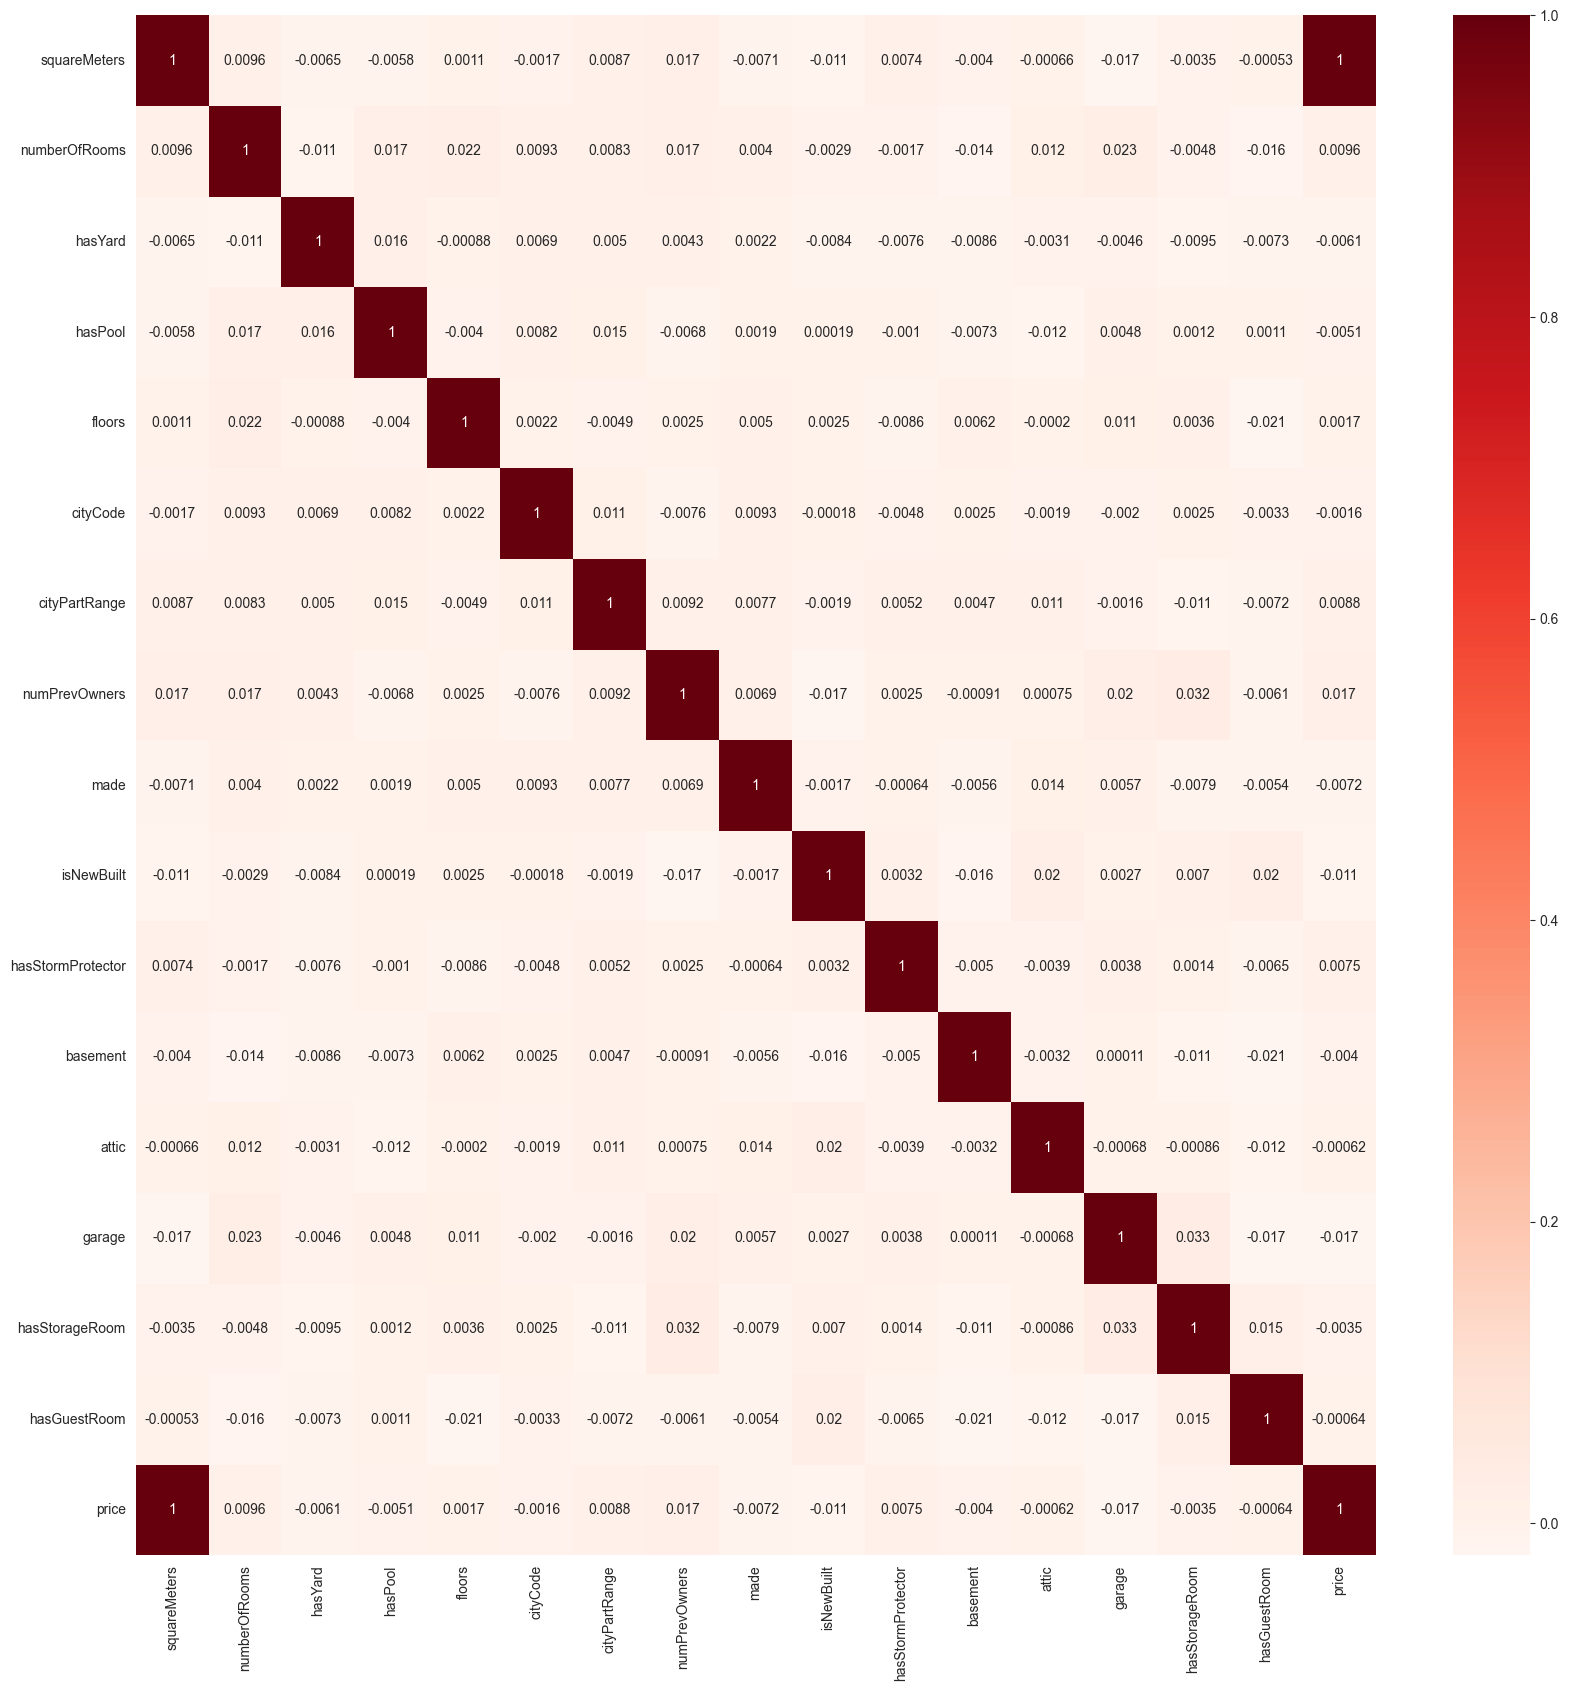

In [16]:
corr = df_svr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
df_svr.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [18]:
df_svr = df_svr[['squareMeters', 'numberOfRooms', 'price']]

## Splitting the data

In [19]:
from sklearn.model_selection import train_test_split
X = df_svr.drop('price', axis=1)
y = df_svr['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape

((8000, 2), (2000, 2))

In [22]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[-0.98192119, -0.22088849],
       [-0.97718748,  0.78872832],
       [ 1.50109024, -0.9868047 ],
       ...,
       [ 1.37546494,  0.51021334],
       [ 1.5750089 ,  1.27612954],
       [-1.10608997,  0.16206961]])

In [28]:
X_test

array([[-1.23244353, -1.54383466],
       [-1.53649318, -0.081631  ],
       [ 0.45129966, -0.39496036],
       ...,
       [ 0.42071263,  0.54502771],
       [ 1.35252466,  1.45020141],
       [ 1.57537303, -0.01200226]])

In [29]:
y_train

7389    2132694.0
9275    2145401.6
2995    9293826.3
5316    5724484.4
356     2530193.9
          ...    
9225    4479097.8
4859    9823508.1
3264    8919647.6
9845    9504611.5
2732    1769201.2
Name: price, Length: 8000, dtype: float64

In [30]:
y_test

9394    1402812.2
898      506461.3
2398    6272659.4
5906    8769157.6
2343     190783.0
          ...    
1037    8116681.0
2899    2978583.5
9549    6189722.9
2740    8868266.9
6690    9505478.9
Name: price, Length: 2000, dtype: float64

## Support Vector Regression

In [31]:
from sklearn.svm import SVR

In [32]:
svr = SVR()

In [33]:
svr.fit(X_train, y_train)

SVR()

In [34]:
y_pred = svr.predict(X_test)

In [35]:
y_pred

array([4985811.08127873, 4985258.53366865, 4987977.84667738, ...,
       4987928.92981286, 4988196.83646382, 4988730.75496019])

In [36]:
y_test

9394    1402812.2
898      506461.3
2398    6272659.4
5906    8769157.6
2343     190783.0
          ...    
1037    8116681.0
2899    2978583.5
9549    6189722.9
2740    8868266.9
6690    9505478.9
Name: price, Length: 2000, dtype: float64

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, y_pred)

-0.00010165083392865704

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(y_test, y_pred)

8039046572221.717

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(y_test, y_pred)

2448348.928607382